<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [283]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

In [284]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [285]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [286]:
npR

array([[-1.2153, -1.4163, -0.8197, -1.2771, -1.4783],
       [ 0.    , -0.6339, -0.4692,  0.0318, -0.1367],
       [ 0.    ,  0.    , -0.4588, -0.0907, -0.1191],
       [ 0.    ,  0.    ,  0.    , -0.5369,  0.3094],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.6133]])

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [287]:
def cgs(A):
    # Get the shape of the matrix A
    m, n = A.shape
    # Initialize Q and R as zero matrices of the same shape as A
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    # Loop over the columns of A
    for j in range(n):
        # Copy the j-th column of A as v
        v = A[:, j].copy()
        # Loop over the previous columns of Q
        for i in range(j):
            # Compute the inner product of Q[:, i] and A[:, j] and store it in R[i, j]
            R[i, j] = np.inner(Q[:, i], A[:, j])
            # Subtract the projection of v onto Q[:, i] from v
            v -= R[i, j] * Q[:, i]
        
        # Normalize v and store it in Q[:, j]
        Q[:, j] = v / np.linalg.norm(v)
        # Compute the inner product of Q[:, j] and A[:, j] and store it in R[j, j]
        R[j, j] = np.inner(Q[:, j], A[:, j])
    ##Your Code ends here
    # Return Q and R
    return Q, R


In [288]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

True

Check if Q is unitary:

In [289]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [290]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [291]:
def mgs(A):
    # Make a copy of A as a floating point matrix and assign it to V
    V = np.array(A, dtype=np.float64)
    # Get the dimensions of A
    m, n = A.shape
    # Initialize Q and R as zero matrices of the same size as A
    Q = np.zeros([m, n], dtype=np.float64)
    R = np.zeros([n, n], dtype=np.float64)
    ##Your Code start here
    # Loop over the indices of the columns of A
    for vec_idx in range(n):
        # Extract the vec_idx-th column of V as v_j
        v_j = V[:, vec_idx]
        # Compute the norm of v_j and store it in R[vec_idx, vec_idx]
        R[vec_idx, vec_idx] = np.linalg.norm(v_j)
        # Divide v_j by its norm and store it in Q[:, vec_idx]
        Q[:, vec_idx] = v_j / R[vec_idx, vec_idx]
        # Loop over the indices of the columns of V that come after vec_idx
        for span_base_idx in range(vec_idx + 1, n):
            # Compute the dot product of Q[:, vec_idx] and V[:, span_base_idx] and store it in R[vec_idx, span_base_idx]
            R[vec_idx, span_base_idx] = np.dot(Q[:, vec_idx], V[:, span_base_idx])
            # Subtract the projection of V[:, span_base_idx] onto Q[:, vec_idx] from V[:, span_base_idx]
            V[:, span_base_idx] -= R[vec_idx, span_base_idx] * Q[:, vec_idx]
    ##Your Code ends here
    # Return Q and R
    return Q, R


In [292]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [293]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [294]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [295]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [296]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

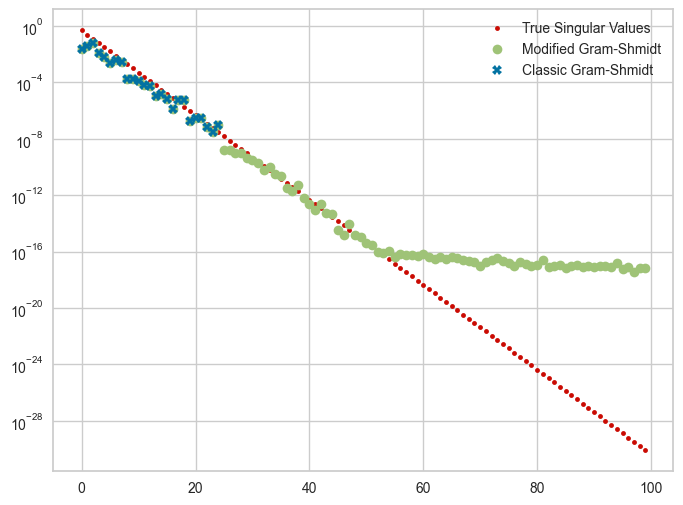

In [297]:
plt.figure(figsize=(8,6))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bX', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [298]:
##Your Code start here
# Define a function that performs the QR algorithm on a matrix A
# and returns its eigenvalues after a given number of iterations
def qr_algorithm(A, num_iterations, iterations):
    # Loop through the iterations
    for iteration in range(1, num_iterations + 1):
        # Decompose A into Q and R using numpy's built-in function
        Q, R = np.linalg.qr(A)
        # Update A by multiplying R and Q
        A = R @ Q
        # Print the eigenvalues of A at some selected iterations
        if iteration in iterations:
            eigenvalues = np.diag(A)
            print(f"Iteration {iteration}: {eigenvalues}")
##Your Code ends here

In [299]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)
print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])
##Your Code start here
# Print a newline and the name of the algorithm
print("\n --- QR Algorithm ---")
# Call the function with A and 100 iterations
qr_algorithm(A,100, [1, 5, 10, 20, 100])
##Your Code ends here

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]

 --- QR Algorithm ---
Iteration 1: [2. 2. 0. 3.]
Iteration 5: [ 2.7929  1.4541 -0.247   3.    ]
Iteration 10: [ 2.8019  1.4451 -0.247   3.    ]
Iteration 20: [ 2.8019  1.445  -0.247   3.    ]
Iteration 100: [ 2.8019  1.445  -0.247   3.    ]


##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

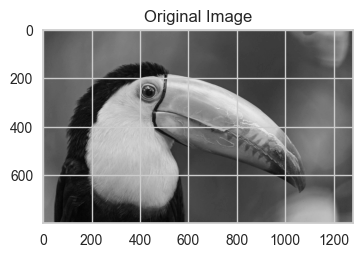

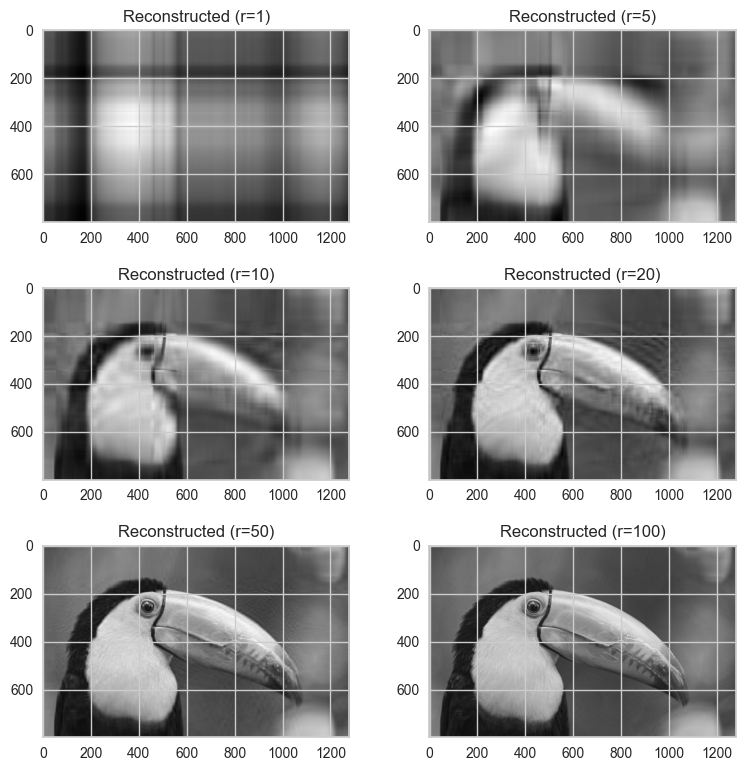

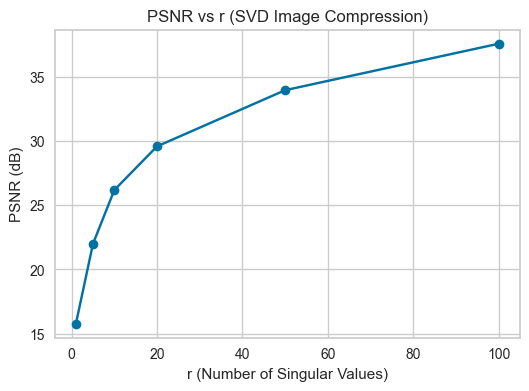

In [300]:
##Your Code start here
# Import the required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image as a grayscale array using opencv
original_image = cv2.imread('pic.jpg', cv2.IMREAD_GRAYSCALE)

# Perform singular value decomposition on the image array using numpy
U, Sigma, Vt = np.linalg.svd(original_image, full_matrices=False)

# Initialize empty lists to store the PSNR values and the reconstructed images
psnr_values = []
reconstructed_images = []

# Define a list of r values to use for image compression
r_values = [1, 5, 10, 20, 50, 100]

# Create a figure with a large size using matplotlib
plt.figure(figsize=(4, 3))
# Display the original image using grayscale colormap
plt.imshow(original_image, cmap='gray')
# Add a title for the original image
plt.title('Original Image')
# Show the plot
plt.show()

# Create a figure with a large size using matplotlib
plt.figure(figsize=(8, 8))
# Loop through the r values
for i, r in enumerate(r_values):
    # Reconstruct the image by multiplying the first r columns of U, the first r diagonal elements of Sigma, and the first r rows of Vt
    reconstructed_image = np.dot(U[:, :r], np.dot(np.diag(Sigma[:r]), Vt[:r, :]))

    # Calculate the mean squared error between the original and the reconstructed image
    mse = np.mean((original_image - reconstructed_image) ** 2)
    # Calculate the peak signal-to-noise ratio using the formula 20 * log10(255 / sqrt(mse))
    psnr = 20 * np.log10(255 / np.sqrt(mse))
    # Append the psnr value to the list
    psnr_values.append(psnr)

    # Add a subplot for the reconstructed image
    plt.subplot(3, 2, i + 1)
    # Display the reconstructed image using grayscale colormap
    plt.imshow(reconstructed_image, cmap='gray')
    # Add a title for the reconstructed image with the r value
    plt.title(f'Reconstructed (r={r})')

# Adjust the spacing between the subplots
plt.tight_layout()
# Show the plot
plt.show()

# Create a new figure with a medium size
plt.figure(figsize=(6, 4))
# Plot the psnr values against the r values using a line with markers
plt.plot(r_values, psnr_values, marker='o')
# Add a title for the plot
plt.title('PSNR vs r (SVD Image Compression)')
# Add a label for the x-axis
plt.xlabel('r (Number of Singular Values)')
# Add a label for the y-axis
plt.ylabel('PSNR (dB)')
# Add a grid to the plot
plt.grid(True)
# Show the plot
plt.show()

##Your Code ends here

###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


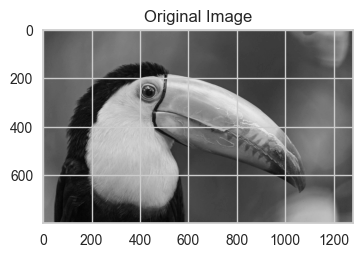

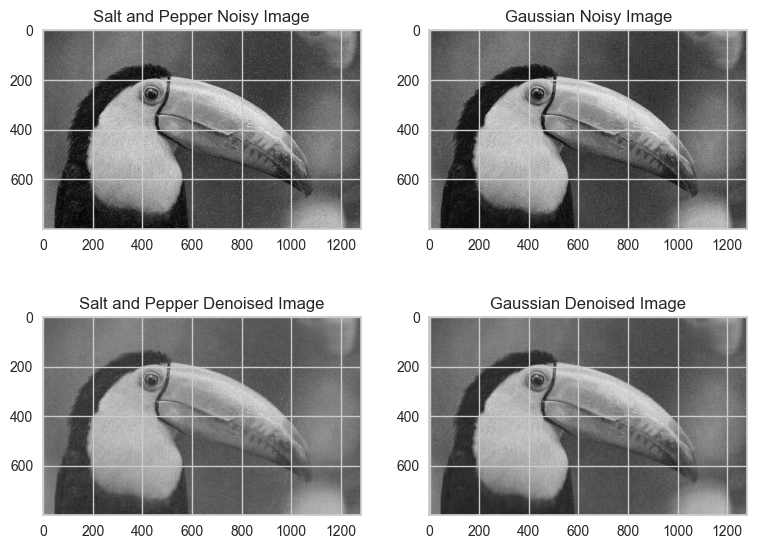

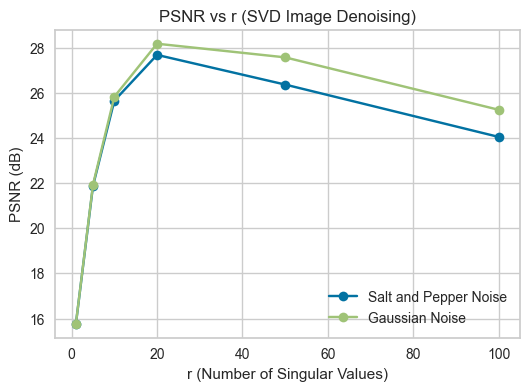

In [301]:
##Your Code start here
# Import numpy and matplotlib libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the probabilities of salt and pepper noise
p_salt = 0.02
p_pepper = 0.02

# Copy the original image array
sp_noisy_img = original_image.copy()
# Get the total number of pixels in the image
total_px = original_image.size
# Add salt noise by randomly setting some pixels to white (255)
n_salt = np.ceil(p_salt * total_px)
salt_idx = [np.random.randint(0, j - 1, int(n_salt)) for j in original_image.shape]
sp_noisy_img[salt_idx[0], salt_idx[1]] = 255
# Add pepper noise by randomly setting some pixels to black (0)
n_pepper = np.ceil(p_pepper * total_px)
pepper_idx = [np.random.randint(0, j - 1, int(n_pepper)) for j in original_image.shape]
sp_noisy_img[pepper_idx[0], pepper_idx[1]] = 0

# Define the mean and standard deviation of Gaussian noise
g_mean = 0
g_std = 25
# Add Gaussian noise by adding a random array to the original image array
g_noisy_img = original_image + np.random.normal(g_mean, g_std, original_image.shape)
# Clip the values to the range [0, 255] and convert to unsigned 8-bit integers
g_noisy_img = np.clip(g_noisy_img, 0, 255).astype(np.uint8)

# Define a list of r values for singular value decomposition (SVD)
r_list = [1, 5, 10, 20, 50, 100]

# Initialize empty lists to store peak signal-to-noise ratio (PSNR) values
psnr_sp = []
psnr_g = []

# Loop over the r values
for r in r_list:
    # Perform SVD on the salt and pepper noisy image
    U, S, V = np.linalg.svd(sp_noisy_img, full_matrices=False)
    # Reconstruct the image using only the first r singular values
    sp_denoised_img = np.dot(U[:, :r], np.dot(np.diag(S[:r]), V[:r, :]))
    # Compute the mean squared error (MSE) between the original and denoised images
    mse_sp = np.mean((original_image - sp_denoised_img) ** 2)
    # Compute the PSNR using the formula 20 * log10(255 / sqrt(MSE))
    psnr_sp.append(20 * np.log10(255 / np.sqrt(mse_sp)))

    # Perform SVD on the Gaussian noisy image
    U, S, V = np.linalg.svd(g_noisy_img, full_matrices=False)
    # Reconstruct the image using only the first r singular values
    g_denoised_img = np.dot(U[:, :r], np.dot(np.diag(S[:r]), V[:r, :]))
    # Compute the MSE between the original and denoised images
    mse_g = np.mean((original_image - g_denoised_img) ** 2)
    # Compute the PSNR using the formula 20 * log10(255 / sqrt(MSE))
    psnr_g.append(20 * np.log10(255 / np.sqrt(mse_g)))

# Plot the original, noisy, and denoised images
plt.figure(figsize=(4, 3))
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.imshow(sp_noisy_img, cmap='gray')
plt.title('Salt and Pepper Noisy Image')

plt.subplot(2, 2, 2)
plt.imshow(g_noisy_img, cmap='gray')
plt.title('Gaussian Noisy Image')

plt.subplot(2, 2, 3)
plt.imshow(sp_denoised_img, cmap='gray')
plt.title('Salt and Pepper Denoised Image')

plt.subplot(2, 2, 4)
plt.imshow(g_denoised_img, cmap='gray')
plt.title('Gaussian Denoised Image')

plt.tight_layout()
plt.show()

# Plot the PSNR values against the r values
plt.figure(figsize=(6, 4))
plt.plot(r_list, psnr_sp, marker='o', label='Salt and Pepper Noise')
plt.plot(r_list, psnr_g, marker='o', label='Gaussian Noise')
plt.title('PSNR vs r (SVD Image Denoising)')
plt.xlabel('r (Number of Singular Values)')
plt.ylabel('PSNR (dB)')
plt.legend()
plt.grid(True)
plt.show()
##Your Code ends here

##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [302]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### Import Dataset

In [303]:
Datapoint = pd.read_csv('Datapoint.csv')


### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

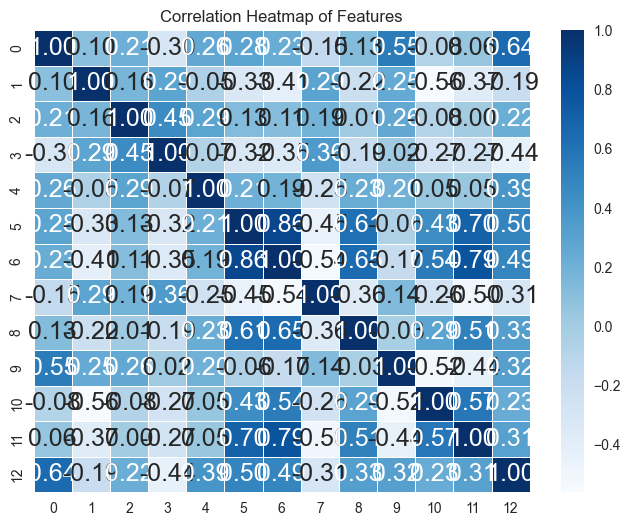

In [304]:
##Your Code start here

# Compute the pairwise correlation coefficients of the columns in Datapoint
corr = np.corrcoef(Datapoint.T)

# Create a new figure with a specified size
plt.figure(figsize=(8, 6))

# Plot the correlation matrix as a heatmap with annotations and a color scheme
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)

# Add a title to the plot
plt.title('Correlation Heatmap of Features')

# Display the plot
plt.show()

##Your Code ends here

By looking at the correlation matrix, we can see the degree of correlation.
Based on the values, we can determine the number of principal components.
We can consider the color of each cell and choose the components that record a high percentage of variance, which are approximately between 2 and 6 components that are suitable for us. We use 3.


###  Data Preprocessing

In [305]:
Datapoint.head()

,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

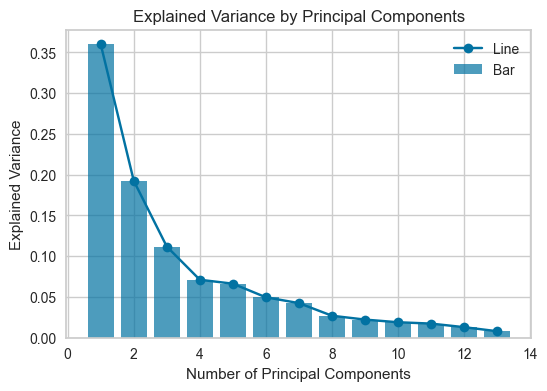

In [306]:
##Your Code start here

# Apply standard scaling to Datapoint using StandardScaler class
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datapoint)

# Calculate the covariance matrix of the scaled data
cov_matrix = np.cov(scaled_data.T)

# Find the eigenvalues and eigenvectors of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and eigenvectors in descending order
eig_vals = eig_vals[np.argsort(eig_vals)[::-1]]
eig_vecs = eig_vecs[:, np.argsort(eig_vals)[::-1]]

# Compute the explained variance ratio of each principal component
exp_var_ratio = eig_vals / np.sum(eig_vals)

# Create a new figure with a specified size
plt.figure(figsize=(6, 4))

# Plot the explained variance ratio as a line and a bar chart
plt.plot(range(1, len(exp_var_ratio) + 1), exp_var_ratio, marker='o', linestyle='-', label='Line')
plt.bar(range(1, len(exp_var_ratio) + 1), exp_var_ratio, alpha=0.7, label='Bar')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

##Your Code ends here

Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [307]:
##Your Code start here
# Import the required libraries
import numpy as np

# Define a function to perform PCA with standard scaling
def pca_StandardScaling(data, num_components):
    # Calculate the mean and standard deviation of each column in data
    mean_vals = np.mean(data, axis=0)
    std_devs = np.std(data, axis=0)

    # Scale the data by subtracting the mean and dividing by the standard deviation
    X_scaled = (data - mean_vals) / std_devs

    # Compute the covariance matrix of the scaled data
    cov_matrix = np.cov(X_scaled.T)

    # Find the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort the eigenvalues and eigenvectors in descending order
    eigenvalues = eigenvalues[np.argsort(eigenvalues)[::-1]]
    eigenvectors = eigenvectors[:, np.argsort(eigenvalues)[::-1]]

    # Select the top num_components eigenvectors
    top_eigenvectors = eigenvectors[:, :num_components]

    # Project the scaled data onto the top eigenvectors
    X_pca = np.dot(X_scaled, top_eigenvectors)

    # Return the projected data
    return X_pca

# Set the number of principal components to 2
num_components = 2 

# Generate random labels for the data
labels = np.random.choice([0, 1, 2], size=Datapoint.shape[0])

# Apply the PCA function to the data
X_pca_StandardScaling = pca_StandardScaling(Datapoint, num_components)
##Your Code ends here

### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

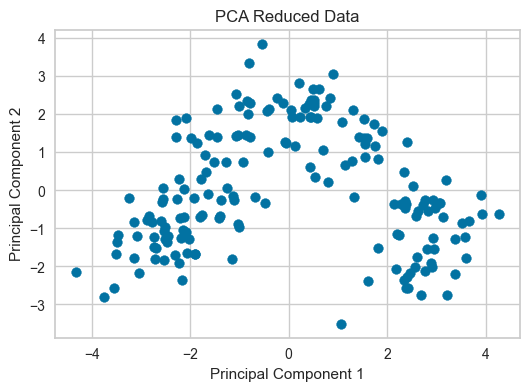

In [308]:
##Your Code start here

# Create a new figure with a specified size
plt.figure(figsize=(6, 4))

# Plot the PCA reduced data as a scatter plot
plt.scatter(X_pca_StandardScaling[:, 0], X_pca_StandardScaling[:, 1])

# Add a title and axis labels to the plot
plt.title('PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a grid to the plot
plt.grid(True)

# Display the plot
plt.show()

##Your Code ends here

### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




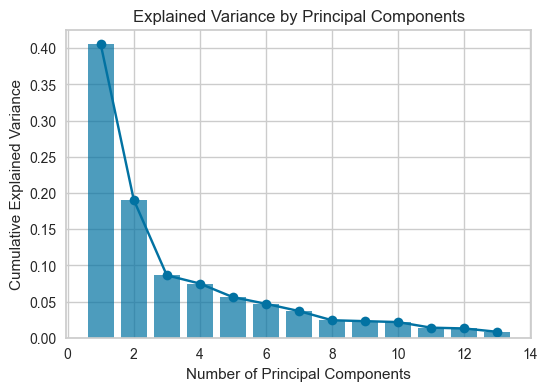

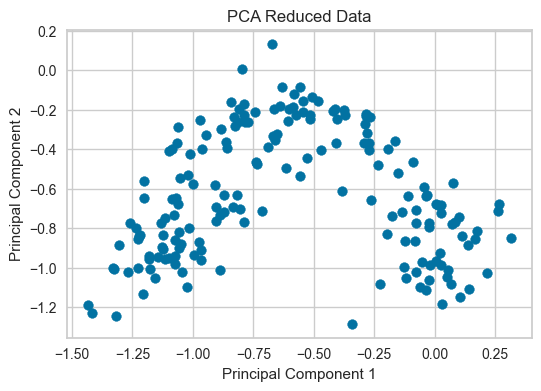

In [309]:
##Your Code start here
# Define a function to perform PCA on a given data set and return the reduced data and the explained variance ratio
def pca_minmax(data, num_components):
    # Scale the data to the range [0, 1] using MinMaxScaler
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    # Compute the covariance matrix of the scaled data
    cov_matrix = np.cov(data_scaled, rowvar=False)

    # Find the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top num_components eigenvectors
    top_eigenvectors = eigenvectors[:, :num_components]

    # Project the scaled data onto the top eigenvectors
    data_pca = np.dot(data_scaled, top_eigenvectors)

    # Compute the explained variance ratio of the principal components
    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

    # Return the reduced data and the explained variance ratio
    return data_pca, explained_variance_ratio

# Apply the PCA function to the Datapoint data set with 11 components
num_components = 11
data_pca_minmax, explained_variance_ratio = pca_minmax(Datapoint, num_components)

# Plot the explained variance ratio of the principal components
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', label='Line')
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Bar')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Plot the reduced data on the first two principal components
plt.figure(figsize=(6, 4))
plt.scatter(data_pca_minmax[:, 0], data_pca_minmax[:, 1])
plt.title('PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
##Your Code ends here

### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

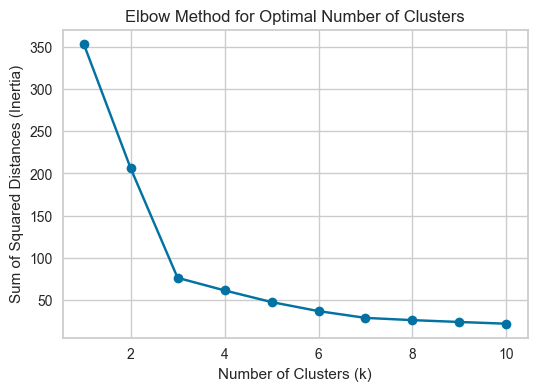

In [310]:
##Your Code start here
# Create a StandardScaler object and apply it to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_StandardScaling)

# Define a list of possible values for the number of clusters
k_values = list(range(1, 11))

# Initialize an empty list to store the sum of squared distances for each k
inertia_values = []

# Loop over the k_values
for k in k_values:
    # Create a KMeans object with k clusters, a fixed random state, and n_init=10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    # Fit the KMeans object to the scaled data
    kmeans.fit(X_scaled)
    # Append the inertia value (sum of squared distances) to the list
    inertia_values.append(kmeans.inertia_)

# Plot the k_values and the inertia_values using a blue line with circle markers
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
# Add a title to the plot
plt.title('Elbow Method for Optimal Number of Clusters')
# Add a label to the x-axis
plt.xlabel('Number of Clusters (k)')
# Add a label to the y-axis
plt.ylabel('Sum of Squared Distances (Inertia)')
# Add a grid to the plot
plt.grid(True)
# Display the plot
plt.show()

##Your Code ends here

What is inertia and silhouette metrics?
Explain them briefly.




Inertia and silhouette are two metrics that are often used to measure the quality of clusters in unsupervised machine learning, especially for clustering algorithms like k-means.

### Inertia
- **Definition:** Inertia, also called the sum of squared distances within clusters, shows how tight the clusters are. It is the sum of the squared distances from each data point in a cluster to the center of that cluster. The aim of k-means clustering is to make the inertia as low as possible.
- **Interpretation:** Smaller inertia values mean more compact and well-separated clusters. However, inertia by itself may not be enough to find the best number of clusters, as it tends to go down as the number of clusters goes up (making smaller, more local clusters).

### Silhouette Score
- **Definition:** The silhouette score shows how similar an object is to its own cluster (cohesion) versus other clusters (separation). It goes from -1 to 1, where a high silhouette score means that the object is well suited to its own cluster and not suited to neighboring clusters. It is computed for each instance and the formula is like this:
  Silhouette Coefficient = (x-y)/ max(x,y)
  where, y is the mean intra-cluster distance: mean distance to the other instances in the same cluster. x is the mean nearest cluster distance, i.e., mean distance to the instances of the next closest cluster.
- **Interpretation:** A silhouette score near 1 means that the object is well suited to its own cluster and not suited to neighboring clusters. A score around 0 means overlapping clusters, and negative scores mean that the object may be in the wrong cluster. The silhouette score is a helpful metric for measuring the quality of clustering when the true number of clusters is unknown.

To sum up, inertia is about the tightness of clusters, while the silhouette score is about both tightness and separation. Both metrics are useful tools for measuring the performance of clustering algorithms and can be used together to get a more complete understanding of the clustering outcomes.

In [311]:
#You should save your final datapoints in pca_std_datapoint variable
pca_std_datapoint = X_pca_StandardScaling

inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 29.56it/s]


In [312]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 25.84it/s]


Plot the **inertia** and **silhouette** values

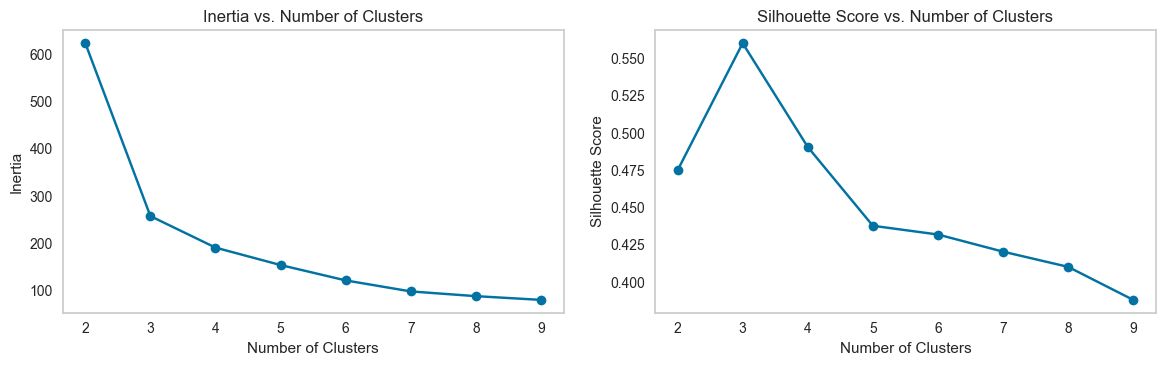

In [313]:
##Your Code start here

# Creating a figure with a size of 12 by 4 inches
fig = plt.figure(figsize=(12, 4))

# Adding a subplot for the inertia plot
ax1 = fig.add_subplot(121)

# Plotting the inertia values for different numbers of clusters using blue circles and lines
ax1.plot(range(2, 10), inertia, 'bo-')

# Setting the title, labels, and grid for the inertia plot
ax1.set_title('Inertia vs. Number of Clusters')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.grid()

# Adding a subplot for the silhouette plot
ax2 = fig.add_subplot(122)

# Plotting the silhouette scores for different numbers of clusters using green circles and lines
ax2.plot(list(silhouette.keys()), list(silhouette.values()), 'bo-')

# Setting the title, labels, and grid for the silhouette plot
ax2.set_title('Silhouette Score vs. Number of Clusters')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')
ax2.grid()

# Adjusting the spacing between the subplots
fig.tight_layout()

# Displaying the figure
plt.show()

##Your Code ends here

Tune the hyper parameters based on your conclusions.

In [314]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++', n_init=10)
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)

#Now plot the datapoints usig two first features
(Each cluster in a different colour)

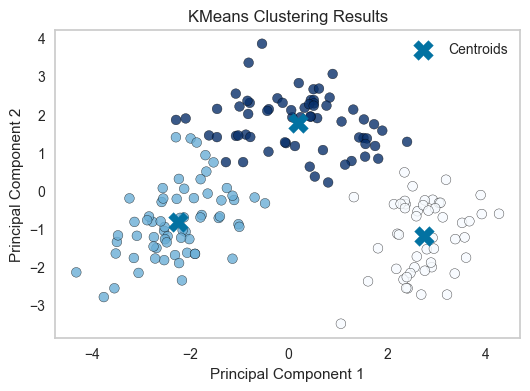

In [315]:
# Creating a scatter plot of the data points with different colors based on the predicted labels
plt.figure(figsize=(6, 4))
plt.scatter(x=pca_std_datapoint[:, 0], y=pca_std_datapoint[:, 1], c=y_predict_kmeans1, edgecolor='black', alpha=0.8, cmap='Blues')

# Creating a scatter plot of the cluster centroids with red crosses and a label
plt.scatter(x=model_kmeans.cluster_centers_[:, 0], y=model_kmeans.cluster_centers_[:, 1], marker='X', s=200, label='Centroids')

# Setting the title and labels for the plot
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adding a legend and a grid to the plot
plt.legend()
plt.grid()

# Displaying the plot
plt.show()

Do all previous steps for MinMax scaled data points.





100%|██████████| 8/8 [00:00<00:00, 18.97it/s]


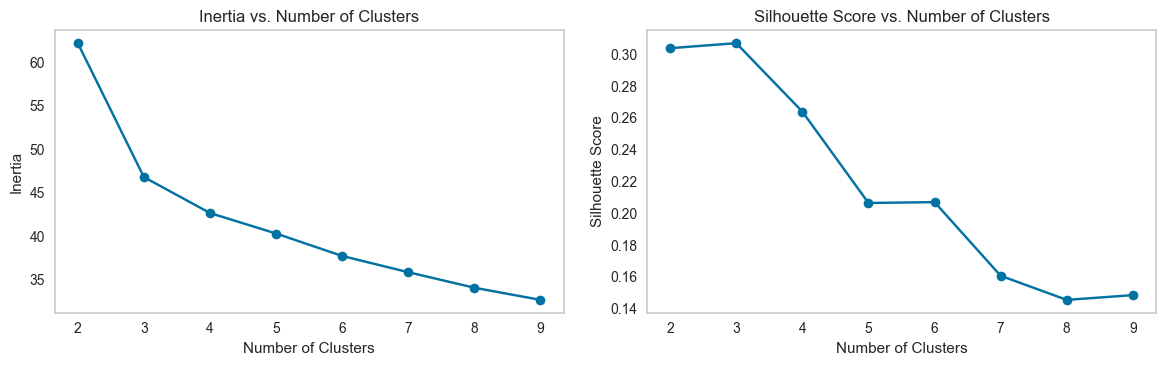

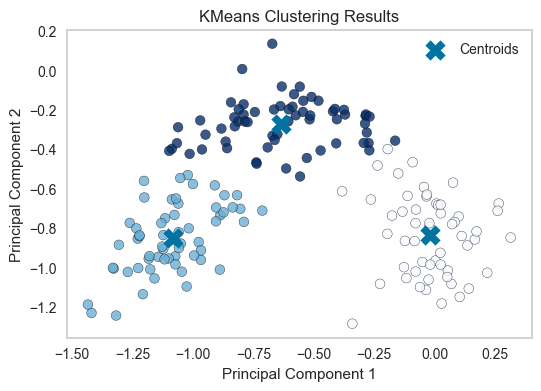

In [316]:
# Assigning the PCA transformed data to a variable
pca_std_datapoint = data_pca_minmax

# Initializing empty lists for inertia and silhouette values
inertia = []
silhouette = []

# Looping over the range of possible number of clusters from 2 to 9
for i in tqdm(range(2,10)):
    # Creating a KMeans object with the given parameters
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    
    # Fitting the model to the data and getting the predicted labels
    labels = kmeans.fit_predict(pca_std_datapoint)
    
    # Appending the inertia value of the model to the inertia list
    inertia.append(kmeans.inertia_)
    
    # Calculating the silhouette score of the model and appending it to the silhouette list
    silhouette.append(silhouette_score(pca_std_datapoint, labels, metric='euclidean'))

# Creating a figure with a size of 12 by 4 inches
fig = plt.figure(figsize=(12, 4))

# Adding a subplot for the inertia plot
ax1 = fig.add_subplot(121)

# Plotting the inertia values for different numbers of clusters using blue circles and lines
ax1.plot(range(2, 10), inertia, 'bo-')

# Setting the title, labels, and grid for the inertia plot
ax1.set_title('Inertia vs. Number of Clusters')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.grid()

# Adding a subplot for the silhouette plot
ax2 = fig.add_subplot(122)

# Plotting the silhouette scores for different numbers of clusters using green circles and lines
ax2.plot(range(2, 10), silhouette, 'bo-')

# Setting the title, labels, and grid for the silhouette plot
ax2.set_title('Silhouette Score vs. Number of Clusters')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')
ax2.grid()

# Adjusting the spacing between the subplots
fig.tight_layout()

# Displaying the figure
plt.show()

# Creating a KMeans object with 3 clusters and the given parameters
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++', n_init=10)

# Fitting the model and predicting the labels
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)

# Creating a scatter plot of the data points with different colors based on the predicted labels
plt.figure(figsize=(6, 4))
plt.scatter(x=pca_std_datapoint[:, 0], y=pca_std_datapoint[:, 1], c=y_predict_kmeans1, edgecolor='black', alpha=0.8, cmap='Blues')

# Creating a scatter plot of the cluster centroids with red crosses and a label
plt.scatter(x=model_kmeans.cluster_centers_[:, 0], y=model_kmeans.cluster_centers_[:, 1], marker='X', s=200, label='Centroids')

# Setting the title and labels for the plot
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adding a legend and a grid to the plot
plt.legend()
plt.grid()

# Displaying the plot
plt.show()

Compare the results of different scaling methods in a PCA problem

* **Scale of Principal Components**: The scatter plots show a clear difference in the axes. The Standard Scaler has a wider range, influenced by the standard deviation of the data, while the Min-Max Scaler squeezes all values into the \[0, 1\] range.

* **Variance Explained**: The explained variance plot shows how much of the total variation in the data is explained by principal components. Ideally, we want to explain a high amount of variation with fewer components. Looking at the cumulative explained variance by principal components, we see that Min-Max Scaler and Standard Scaler explain almost the same amount of variation with the first two components.

* **Inertia**: In the case of Standard Scaler, inertia measures the variation within clusters compared to the standard deviation of each feature. If features have large variations, standard scaling normalizes them, which may lead to more balanced clusters in terms of standard deviations. Higher inertia values come from rescaling the data, especially when the original variations are large. On the other hand, with Min-Max Scaler, inertia measures the variation within clusters compared to the \[0, 1\] range of each feature. All features have the same weight in inertia calculations as they are on the same \[0, 1\] scale. In Min-Max Scaler, inertia values are lower, because the data is limited to a fixed range, which limits the squared distances. It's important to note that inertia is not a normalized measure, and its absolute value depends on the scale of the data. When comparing inertia across different scaling methods, we should focus on the shape of the inertia curve (as in the Elbow Method) rather than the absolute inertia values to find the best number of clusters.

* **Silhouette**: In the context of Standard Scaler, this method makes sure that each feature has the same impact on distance calculations in the silhouette score by normalizing feature scales based on variation. The silhouette score is not affected by the different scales of the original features, which is very useful when dealing with features on different scales or with high variations. On the other hand, Min-Max Scaler changes features into a fixed \[0, 1\] range, which makes all features have the same impact on distance calculations in the silhouette score. However, Min-Max Scaler does not take into account variation within features, keeping differences in variation. This can affect the silhouette score if features have very different variations. Unlike inertia, the absolute values of silhouette scores can be directly compared across different scaling methods. A higher silhouette score means that the scaling method may have improved clustering by separating clusters better or making clusters tighter. Since Min-Max Scaler has a higher silhouette score with 3 clusters, we can say that it improves clustering.

* **Outlier Sensitivity**:  Standard Scaler is sensitive to outliers because it depends on mean and standard deviation, both of which can be influenced by extreme values. On the other hand, Min-Max Scaler shows a lower sensitivity to outliers in terms of the scaling effect, although it may still be affected by extreme values within the range it normalizes to.

* **Interpretation of Axes**: In the case of Standard Scaler, the axes on the PCA plot represent how many standard deviations away from the mean of the data are. On the other hand, Min-Max Scaler interprets the axes in terms of the ratio between the minimum and maximum values of the data.